In [1]:
#if you have any errors, do the following: 
#conda activate NLP_py38 
#cde data download 
#The first step is to collect data. Here we take a one-sentence example to 
#demonstrate the simplest text preprocessing before model training.


#one of the key concept in NLP is tokenize, i.e., split sentences into words.
#This cell and the following will show how this is achieved with gensim and a 
#toolkit that I developed.

from alloy2vec.processing import MaterialsTextProcessor
text_processor = MaterialsTextProcessor()
text_processor.process("New York University is one of the best universities in the world.")

(['new',
  'york',
  'university',
  'is',
  'one',
  'of',
  'the',
  'best',
  'universities',
  'in',
  'the',
  'world',
  '.'],
 [])

In [3]:
# tokenize sentences directly using gensim

from gensim.utils import tokenize
list(tokenize("New York University is one of the best universities in the world."))

['New',
 'York',
 'University',
 'is',
 'one',
 'of',
 'the',
 'best',
 'universities',
 'in',
 'the',
 'world']

In [4]:
#stop words, like "is", "one", "the", "of", are not really useful when included in
#the training dataset.
#remove the stop words 
from gensim.parsing.preprocessing import remove_stopwords,strip_punctuation
remove_stopwords("New York University is one of the best universities in the world.")

'New York University best universities world.'

In [5]:
#similarly, punctuations like ",", ".", are also not important to include.

words_no_stopwords=remove_stopwords("Lead is considered one of the softest metals.")
strip_punctuation(words_no_stopwords)

'Lead considered softest metals '

In [6]:
#Let's look at the tokenized words again after text preprocessed.

words_no_stopwords_punctuation=strip_punctuation(words_no_stopwords)
text_processor.process(words_no_stopwords_punctuation)

(['lead', 'considered', 'softest', 'metals'], [('Lead', 'Pb')])

In [1]:
# we skip the time-consuming data training
# Let's try on one model that I trained.

#load the model. May take a while, given the model's large size.
from gensim.models import Word2Vec 
w2v_model =Word2Vec.load("/home/etica/Project/alloy2vec/alloy2vec/training/models/1model_with_wx_process_parallel") 

In [2]:
#let's have a look at the one-dimentional word vector and its dimensional size

word="excellent"
print("word vector of "+str(word)+" :", w2v_model.wv.get_vector(word))
print("dimension size:", len(w2v_model.wv.get_vector(word)))

word vector of excellent : [-0.02778837 -0.05271108  0.06160482  0.26307014  0.17540202 -0.09506764
 -0.1984087  -0.47024208 -0.16369891  0.04087783  0.13989961 -0.20025863
  0.1763851   0.1566626   0.01661627  0.08242878 -0.00639261  0.0877219
  0.05057085  0.27894995  0.09247967  0.00366693 -0.14580363 -0.12817086
  0.07136576 -0.02674836  0.05564704  0.06145919  0.27719712  0.3467125
 -0.15473555  0.00582545 -0.10621308 -0.00250296  0.17825818 -0.09907473
  0.378511   -0.28803793  0.20792772 -0.01872611 -0.5109213  -0.03515572
 -0.14066559  0.16492921  0.14950952 -0.1617789  -0.03092928 -0.30414128
  0.14906564 -0.07599012  0.06401224  0.05807508 -0.15867688 -0.15354578
 -0.05687931  0.05763347 -0.46654862 -0.41385272  0.14686646  0.21050923
  0.31961712  0.14112505  0.303086   -0.14643602  0.12679505  0.0660345
  0.19959624  0.02032077  0.12741153 -0.2008596  -0.07119072 -0.0567811
  0.20745425  0.26200977  0.00843078  0.1447566  -0.18759212 -0.08976553
  0.0058051  -0.04497131  0.

In [3]:
# one simple example to check the most similar words of "excellent"
# try different words if you like. If the word is not included in the
# vocabulary, it may complains. Then, try a different one.
word="excellent"
w2v_model.wv.most_similar(word)

[('outstanding', 0.9540879726409912),
 ('superior', 0.9137853384017944),
 ('good', 0.9067513346672058),
 ('superb', 0.8755224943161011),
 ('exceptional', 0.8516480326652527),
 ('impressive', 0.8225080966949463),
 ('remarkable', 0.8157241940498352),
 ('decent', 0.8102836608886719),
 ('extraordinary', 0.7937225699424744),
 ('admirable', 0.7858894467353821)]

[('outstanding', 0.9540879726409912), ('superior', 0.9137853384017944), ('good', 0.9067513346672058), ('superb', 0.8755224943161011), ('exceptional', 0.8516480326652527), ('impressive', 0.8225080966949463), ('remarkable', 0.8157241940498352), ('decent', 0.8102836608886719), ('extraordinary', 0.7937225699424744), ('admirable', 0.7858894467353821), ('desirable', 0.7658401131629944), ('performance', 0.764317512512207), ('satisfactory', 0.7569599151611328), ('stability', 0.7551912069320679), ('high', 0.7366472482681274), ('greatly_improved', 0.7319730520248413), ('performances', 0.726570188999176), ('greatly_enhanced', 0.7124494314193726), ('long_term_stability', 0.7115359902381897), ('property', 0.7066050171852112)]


Text(0.5, 1.0, 'Ranking of cosine similarity for "excellent"')

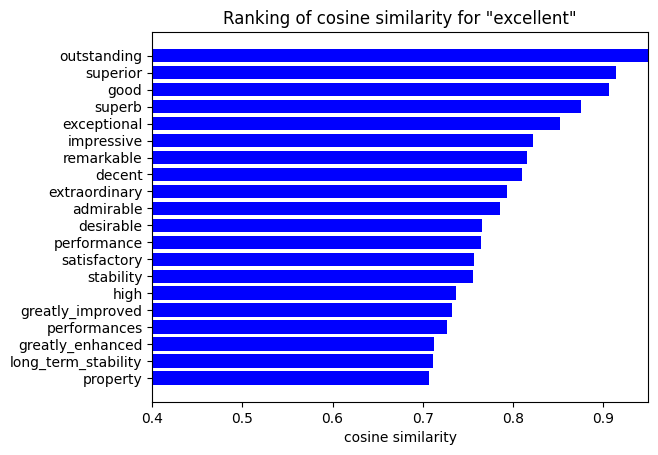

In [4]:
import matplotlib.pyplot as plt
import numpy as np

a=w2v_model.wv.most_similar(word,topn=20) #200
word_candidates,cosine_similarity=[],[]
print(a)
for i in range(0,20): #len(a)):
  word_candidates.append(a[i*1][0])
  cosine_similarity.append(a[i*1][1])
word_num=np.arange(len(word_candidates))
fig, ax = plt.subplots()
ax.barh(word_num, cosine_similarity,color='blue', align='center') #color='#0504aa',
ax.set_yticks(word_num)
ax.set_yticklabels(word_candidates)
ax.invert_yaxis()  # labels read top-to-bottom
plt.xlim((0.4,0.95))
ax.set_xlabel('cosine similarity')
ax.set_title('Ranking of cosine similarity for'+' "'+word+'"')

In [5]:
# try some chemical concept:
# the full name of chemical elements.

w2v_model.wv.most_similar(
    positive=["magnesium", "Fe"], 
    negative=["Mg"], topn=1)

[('iron', 0.8533509969711304)]

[('Mn', 0.8777176737785339), ('Co', 0.8504608869552612), ('Ni', 0.8059017658233643), ('Cr', 0.767402708530426), ('Cu', 0.7601847648620605), ('fe-', 0.7199352383613586), ('Zn', 0.7042602300643921), ('Ca', 0.6882820725440979), ('Mo', 0.6816626191139221), ('Ca_Mg', 0.6487935185432434), ('Ba', 0.6440286636352539), ('FeMn', 0.6410624980926514), ('Al', 0.640954852104187), ('Zn_As_Br_Rb_Sr', 0.6323394179344177), ('Ce', 0.619371235370636), ('iron', 0.6166086792945862), ('Zn_Br_Rb_Sr', 0.6131720542907715), ('mn-', 0.610100507736206), ('ni-', 0.6038298010826111), ('cu-', 0.6015627980232239)]


Text(0.5, 1.0, 'Ranking of cosine similarity for "Fe"')

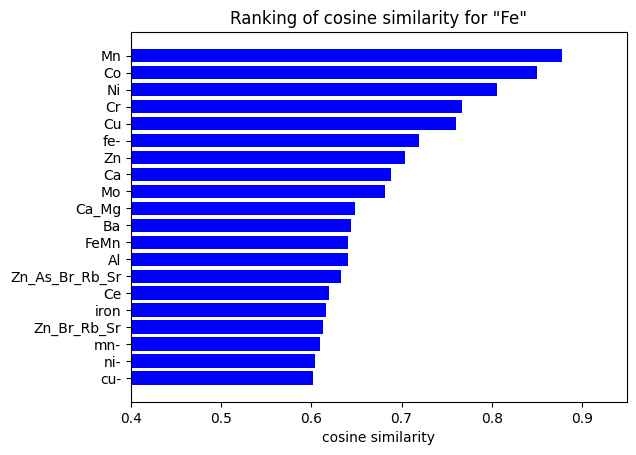

In [8]:
import matplotlib.pyplot as plt
import numpy as np

a=w2v_model.wv.most_similar(word1,topn=20) #200
word_candidates,cosine_similarity=[],[]
print(a)
for i in range(0,20): #len(a)):
  word_candidates.append(a[i*1][0])
  cosine_similarity.append(a[i*1][1])
word_num=np.arange(len(word_candidates))
fig, ax = plt.subplots()
ax.barh(word_num, cosine_similarity,color='blue', align='center') #color='#0504aa',
ax.set_yticks(word_num)
ax.set_yticklabels(word_candidates)
ax.invert_yaxis()  # labels read top-to-bottom
plt.xlim((0.4,0.95))
ax.set_xlabel('cosine similarity')
ax.set_title('Ranking of cosine similarity for'+' "'+word1+'"')